**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

# Data Preparation

In [2]:
from sklearn.datasets import load_breast_cancer

frame = load_breast_cancer(as_frame=True)
df = frame['data']
X = df.values
y = np.array(frame['target'])

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Partitioning

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [6]:
X_train.shape

(398, 30)

# Classification

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9590643274853801
F1-score [0.94488189 0.96744186]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Variance Threshold

In [9]:
from sklearn.feature_selection import VarianceThreshold

In [10]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(398, 11)

In [11]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9239766081871345
F1-score [0.9037037  0.93719807]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        64
           1       0.97      0.91      0.94       107

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



# Univariate Feature Selection

In [12]:
from sklearn.feature_selection import SelectKBest

In [13]:
sel = SelectKBest(k=10)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(398, 10)

In [14]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9590643274853801
F1-score [0.94488189 0.96744186]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Recursive Feature Elimination

In [15]:
from sklearn.feature_selection import SelectFromModel

In [16]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(398, 4)

In [17]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9590643274853801
F1-score [0.94488189 0.96744186]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Principal Component Analysis

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [20]:
X_train_pca.shape

(398, 2)

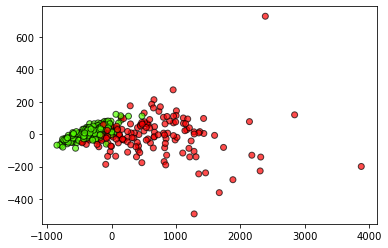

In [21]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [22]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9122807017543859
F1-score [0.88188976 0.93023256]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        64
           1       0.93      0.93      0.93       107

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



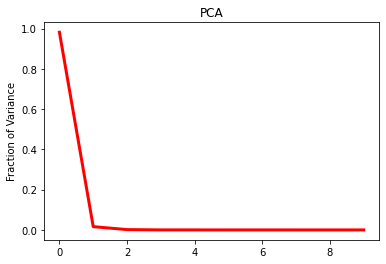

In [23]:
plt.plot(PCA(n_components=10).fit(X).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

# Random Subspace Projection

In [24]:
from sklearn import random_projection

In [42]:
rsp = random_projection.GaussianRandomProjection(n_components=2)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(398, 2)

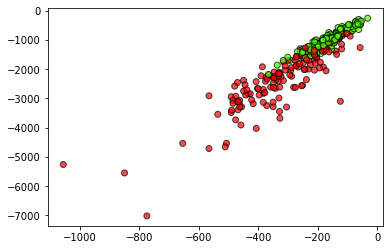

In [43]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [44]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9122807017543859
F1-score [0.88721805 0.92822967]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.95      0.91      0.93       107

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.92      0.91      0.91       171



# Multi Dimensional Scaling

In [28]:
from sklearn.manifold import MDS

In [29]:
mds = MDS(n_components=2)
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

(398, 2)

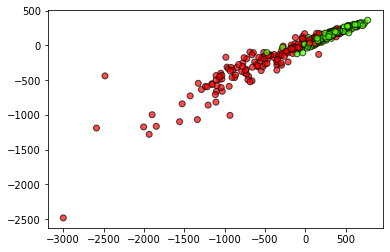

In [30]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [31]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9597989949748744
F1-score [0.94557823 0.96812749]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       148
           1       0.96      0.97      0.97       250

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



# IsoMap

In [32]:
from sklearn.manifold import Isomap

In [33]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(398, 2)

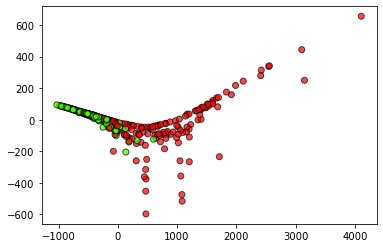

In [34]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [35]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_iso, y_train)

y_pred = clf.predict(X_train_iso)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9623115577889447
F1-score [0.94915254 0.97005988]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       148
           1       0.97      0.97      0.97       250

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



# t-SNE

In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(398, 2)

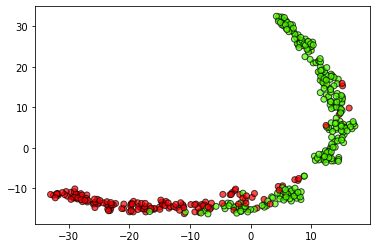

In [38]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [39]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9597989949748744
F1-score [0.94557823 0.96812749]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       148
           1       0.96      0.97      0.97       250

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



https://jhui.github.io/2017/01/15/Machine-learning-Multi-dimensional-scaling-and-visualization/